# Ler o arquivo .mat

In [76]:
from scipy.io import loadmat
import os
from os import listdir
from os.path import isfile, join
import argparse
import cv2
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.axes as axes
import matplotlib.transforms as mtransforms
import matplotlib as mpl
from PIL import Image
import numpy as np
import math

data = loadmat("../VIS_Onboard/HorizonGT/MVI_0790_VIS_OB_HorizonGT")

# get the number of frames
frames_number = len(data['structXML'][0])
print(data['structXML'][0][0])

# horizon = (x, y, cos a, sen a) - See Explanation of GT files
horizon = data['structXML'][0][0]

(array([[960.5]]), array([[466.36252683]]), array([[0.02444696]]), array([[0.99970113]]))


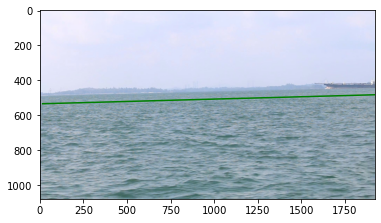

[[480.25]]
[[233.18126341]]


In [116]:
# draw horizon line for the image
im = np.array(Image.open("../VIS_Onboard/VIS_Onboard_frames/MVI_0790_VIS_OB_frame0.jpg"), dtype=np.uint8)

# Create figure and axes
fig,ax = plt.subplots(1)

# Display the image
ax.imshow(im)

# Linha basica
# axes.Axes.axhline(ax, y=horizon[1], linewidth=1, color='r')
#2 line = axes.Axes.axhline(ax, y=horizon[1], linewidth=1, color='b')

#Rotate line
line = plt.axhline(y=horizon[1], color='g', linestyle='-')
#line.set_transform(line.get_transform() + mtransforms.Affine2D().rotate_deg_around(horizon[0], horizon[1], math.asin(horizon[3])))
#line.set_transform(line.get_transform() + mtransforms.Affine2D().rotate_deg(math.asin(horizon[3])))

# Translada para origem para rotacionar
x_trans, y_trans = horizon[0]/2, horizon[1]/2
line.set_transform(line.get_transform() + mtransforms.Affine2D().translate(-1*x_trans,-1*y_trans).rotate_deg_around(0, 0, math.asin(horizon[3])).translate(x_trans,y_trans))

# Teste diagonal
# coords_i = ts.transform([0, 1])
# coords_f = ts.transform([0, 1])
# ax.plot(coords_i, coords_f, c=".3")

# ax.plot([0, 1], [0.5, 0.8], transform=ax.transAxes)

plt.show()

print(x_trans)
print(y_trans)